In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
import visual_behavior.data_access.loading as loading
import visual_behavior.visualization.utils as utils

import visual_behavior.ophys.response_analysis.cell_metrics as cell_metrics

### get platform paper experiments table

In [5]:
experiments_table = loading.get_platform_paper_experiment_table()

### load all experiments cell metrics table for a set of conditions

#### trace metrics

In [6]:
%%time

condition = 'traces' # can be 'changes', 'omissions', 'images', or 'traces'
session_subset = 'full_session' # can be 'engaged', 'disengaged', or 'full_session'
stimulus = 'full_session' # can be 'all_images', 'pref_image'
use_events = False 
filter_events = False

metrics_df = cell_metrics.load_metrics_table_for_experiments('all_experiments', condition, stimulus, 
                                                             session_subset, use_events, filter_events)

metrics_df = metrics_df.merge(experiments_table, on='ophys_experiment_id')

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['condition', 'stimuli', 'session_subset', 'exception']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


Wall time: 914 ms


In [7]:
len(metrics_df.ophys_experiment_id.unique())

1249

In [8]:
len(experiments_table)

1249

#### stimulus locked metrics

In [9]:
%%time

condition = 'changes' # can be 'changes', 'omissions', 'images', or 'traces'
session_subset = 'full_session' # can be 'engaged', 'disengaged', or 'full_session'
stimulus = 'pref_image' # can be 'all_images', 'pref_image'
use_events = True 
filter_events = True

metrics_df = cell_metrics.load_metrics_table_for_experiments('all_experiments', condition, stimulus, 
                                                             session_subset, use_events, filter_events)


Wall time: 422 ms


In [10]:
metrics_df

,cell_specimen_id,pref_image,non_pref_image,mean_response,image_selectivity_index,image_selectivity_index_one_vs_all,lifetime_sparseness,fraction_significant_p_value_gray_screen,fano_factor,reliability,running_modulation_index,hit_miss_index,ophys_experiment_id,condition,session_subset,stimuli,use_events,filter_events
0,1086489529,im063,im061,2.585326e-03,1.000000,1.000000,1.000000,0.200000,4.000000,NaN,NaN,1.0,775614751,changes,full_session,pref_image,True,True
1,1086489533,im085,im061,3.253550e-02,1.000000,0.971764,0.961193,1.000000,1.142924,NaN,0.343253,NaN,775614751,changes,full_session,pref_image,True,True
2,1086489541,im061,im063,2.709228e-03,1.000000,1.000000,1.000000,0.200000,4.000000,NaN,1.000000,NaN,775614751,changes,full_session,pref_image,True,True
3,1086489548,im069,im061,2.344591e-05,1.000000,1.000000,1.000000,0.333333,2.828427,NaN,-1.000000,NaN,775614751,changes,full_session,pref_image,True,True
4,1086489555,im066,im061,4.323673e-03,1.000000,1.000000,1.000000,0.200000,4.000000,NaN,NaN,1.0,775614751,changes,full_session,pref_image,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1120126493,im054,im045,3.802641e-03,1.000000,0.592474,0.716750,0.023256,12.961481,NaN,1.000000,1.0,1088916626,changes,full_session,pref_image,True,True
95,1120126570,im073,im000,5.190533e-31,1.000000,1.000000,1.000000,0.023810,12.806248,NaN,-1.000000,-1.0,1088916626,changes,full_session,pref_image,True,True
96,1120131852,im073,im031,3.980598e-05,1.000000,0.999998,0.999998,0.047619,12.806248,1.0,-1.000000,-1.0,1088916626,changes,full_session,pref_image,True,True
97,1120131889,im031,im075,2.916905e-03,1.000000,0.928581,0.929131,0.023810,12.806248,NaN,1.000000,-1.0,1088916626,changes,full_session,pref_image,True,True


In [11]:
len(metrics_df.ophys_experiment_id.unique())

1243

In [12]:
len(experiments_table)

1249

what metrics are available?

In [14]:
metrics = list(metrics_df.keys())[3:11]
metrics

['mean_response',
 'image_selectivity_index',
 'image_selectivity_index_one_vs_all',
 'lifetime_sparseness',
 'fraction_significant_p_value_gray_screen',
 'fano_factor',
 'reliability',
 'running_modulation_index']

### plots by experience level 

In [56]:
experience_levels = np.sort(metrics_df.experience_level.unique())
cell_types = np.sort(metrics_df.cell_type.unique())
palette = utils.get_experience_level_colors()


### limit to last familiar second novel and get metrics for matched and unmatched cells 

In [85]:
import visual_behavior.data_access.utilities as utilities

metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
metrics_df = utilities.limit_to_last_familiar_second_novel_active(metrics_df)

matched_metrics = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
matched_metrics = utilities.limit_to_last_familiar_second_novel_active(matched_metrics)
matched_metrics = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(matched_metrics)

matched_cells = matched_metrics.cell_specimen_id.unique()
unmatched_metrics = metrics_df[metrics_df.cell_specimen_id.isin(matched_cells)==False]


In [89]:
unmatched_metrics.groupby(['cell_specimen_id']).count().rename(columns={'pref_image':'n_sessions'})[['n_sessions']].reset_index().groupby(['n_sessions']).count()

,cell_specimen_id
n_sessions,
1,7764
2,4071


### mean response

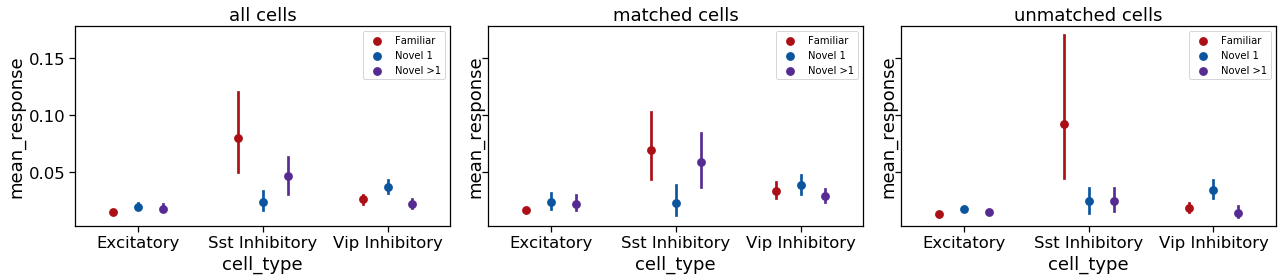

In [90]:
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey=True)
ax[0] = sns.pointplot(data=metrics_df, x='cell_type', y='mean_response', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[0])
ax[0].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[0].set_title('all cells')

ax[1] = sns.pointplot(data=matched_metrics, x='cell_type', y='mean_response', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[1])
ax[1].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[1].set_title('matched cells')

ax[2] = sns.pointplot(data=unmatched_metrics, x='cell_type', y='mean_response', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[2])
ax[2].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[2].set_title('unmatched cells')
fig.tight_layout()

### reliability

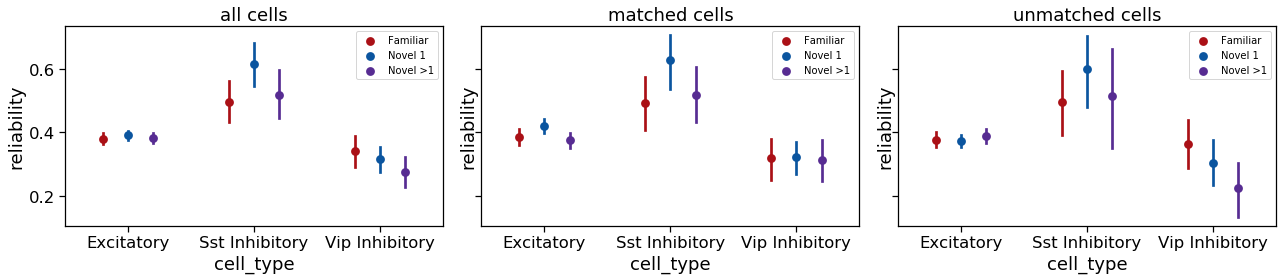

In [91]:
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey=True)
ax[0] = sns.pointplot(data=metrics_df, x='cell_type', y='reliability', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[0])
ax[0].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[0].set_title('all cells')

ax[1] = sns.pointplot(data=matched_metrics, x='cell_type', y='reliability', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[1])
ax[1].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[1].set_title('matched cells')

ax[2] = sns.pointplot(data=unmatched_metrics, x='cell_type', y='reliability', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[2])
ax[2].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[2].set_title('unmatched cells')
fig.tight_layout()

### fraction responsive trials

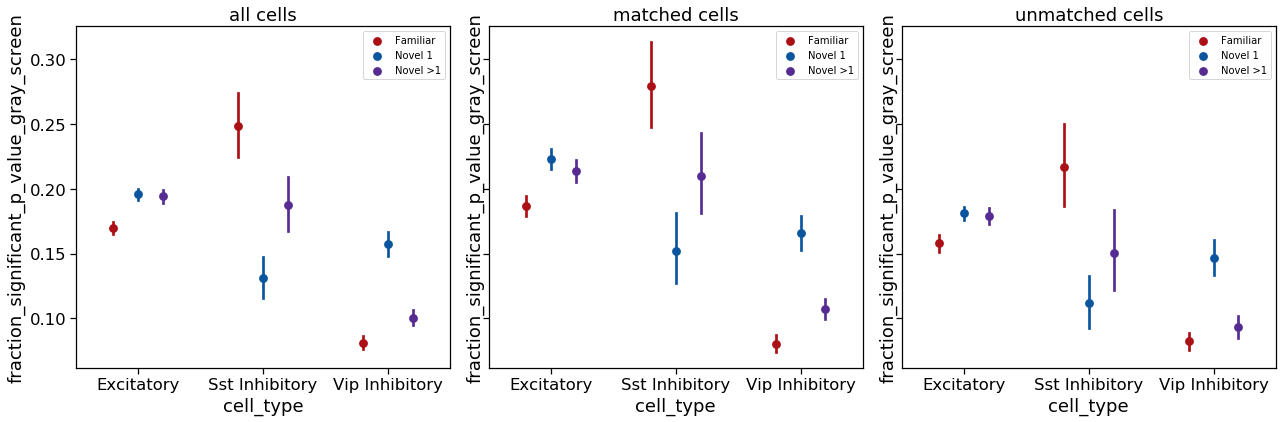

In [92]:
fig, ax = plt.subplots(1,3, figsize = (18,6), sharey=True)
ax[0] = sns.pointplot(data=metrics_df, x='cell_type', y='fraction_significant_p_value_gray_screen', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[0])
ax[0].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[0].set_title('all cells')

ax[1] = sns.pointplot(data=matched_metrics, x='cell_type', y='fraction_significant_p_value_gray_screen', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[1])
ax[1].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[1].set_title('matched cells')

ax[2] = sns.pointplot(data=unmatched_metrics, x='cell_type', y='fraction_significant_p_value_gray_screen', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[2])
ax[2].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[2].set_title('unmatched cells')
fig.tight_layout()

### lifetime sparseness

#### all cells

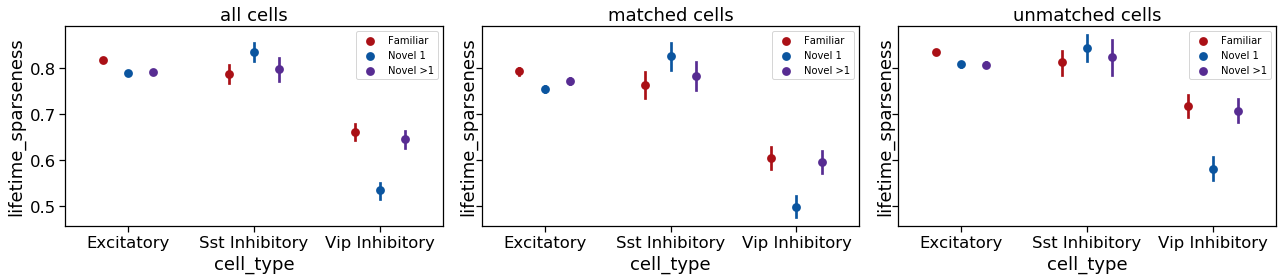

In [93]:
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey=True)
ax[0] = sns.pointplot(data=metrics_df, x='cell_type', y='lifetime_sparseness', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[0])
ax[0].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[0].set_title('all cells')

ax[1] = sns.pointplot(data=matched_metrics, x='cell_type', y='lifetime_sparseness', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[1])
ax[1].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[1].set_title('matched cells')

ax[2] = sns.pointplot(data=unmatched_metrics, x='cell_type', y='lifetime_sparseness', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[2])
ax[2].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[2].set_title('unmatched cells')
fig.tight_layout()

#### responsive cells only

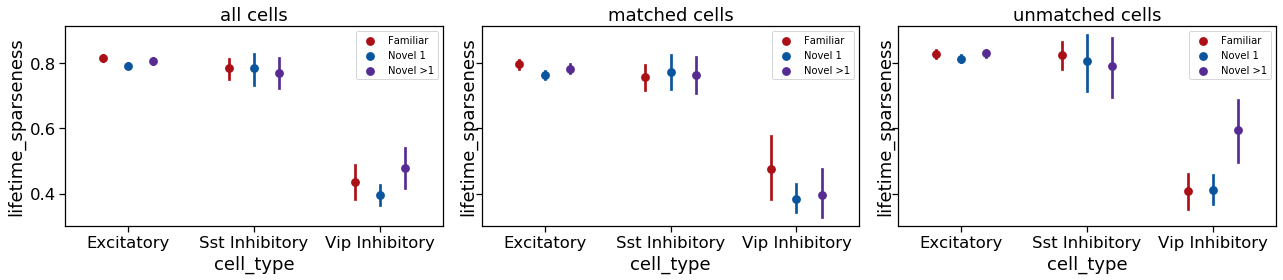

In [94]:
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey=True)
ax[0] = sns.pointplot(data=metrics_df[metrics_df.fraction_significant_p_value_gray_screen>0.25], 
                      x='cell_type', y='lifetime_sparseness', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[0])
ax[0].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[0].set_title('all cells')

ax[1] = sns.pointplot(data=matched_metrics[matched_metrics.fraction_significant_p_value_gray_screen>0.25], 
                      x='cell_type', y='lifetime_sparseness', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[1])
ax[1].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[1].set_title('matched cells')

ax[2] = sns.pointplot(data=unmatched_metrics[unmatched_metrics.fraction_significant_p_value_gray_screen>0.25], 
                      x='cell_type', y='lifetime_sparseness', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[2])
ax[2].legend(bbox_to_anchor=(1,1), fontsize='medium', title='')
ax[2].set_title('unmatched cells')
fig.tight_layout()

### running modulation 

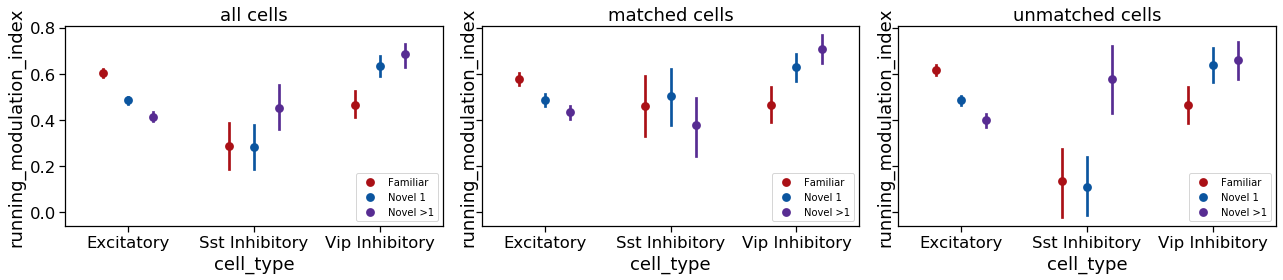

In [95]:
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey=True)
ax[0] = sns.pointplot(data=metrics_df, x='cell_type', y='running_modulation_index', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[0])
ax[0].legend(loc='lower right', fontsize='medium', title='')
ax[0].set_title('all cells')

ax[1] = sns.pointplot(data=matched_metrics, x='cell_type', y='running_modulation_index', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[1])
ax[1].legend(loc='lower right', fontsize='medium', title='')
ax[1].set_title('matched cells')

ax[2] = sns.pointplot(data=unmatched_metrics, x='cell_type', y='running_modulation_index', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[2])
ax[2].legend(loc='lower right', fontsize='medium', title='')
ax[2].set_title('unmatched cells')
fig.tight_layout()

### hit miss index

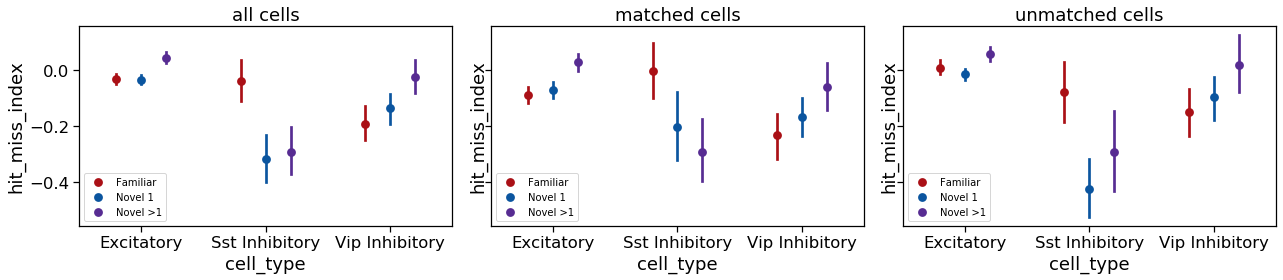

In [96]:
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey=True)
ax[0] = sns.pointplot(data=metrics_df, x='cell_type', y='hit_miss_index', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[0])
ax[0].legend(loc='lower left', fontsize='medium', title='')
ax[0].set_title('all cells')

ax[1] = sns.pointplot(data=matched_metrics, x='cell_type', y='hit_miss_index', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[1])
ax[1].legend(loc='lower left', fontsize='medium', title='')
ax[1].set_title('matched cells')

ax[2] = sns.pointplot(data=unmatched_metrics, x='cell_type', y='hit_miss_index', hue='experience_level', 
              palette=palette, hue_order=experience_levels, order=cell_types,
             join=False, dodge=0.4, ax=ax[2])
ax[2].legend(loc='lower left', fontsize='medium', title='')
ax[2].set_title('unmatched cells')
fig.tight_layout()